## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
import splitfolders
input_folder= "C:\\Users\\ansar\\Desktop\\Fabric defect detection using inception v3 final\\final\\input\\Data"
output= "C:\\Users\\ansar\\Desktop\\Fabric defect detection using inception v3 final\\final\\input\\pre-processed"
splitfolders.ratio(input_folder,output,seed=42,ratio=(.6,.2,.2))

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = "C:\\Users\\ansar\\Desktop\\Fabric defect detection using inception v3 final\\final\\input\\pre-processed\\train"
valid_path = "C:\\Users\\ansar\\Desktop\\Fabric defect detection using inception v3 final\\final\\input\\pre-processed\\val"


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('C:\\Users\\ansar\\Desktop\\Fabric defect detection using inception v3 final\\final\\input\\pre-processed\\train\\*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:\\Users\\ansar\\Desktop\\Fabric defect detection using inception v3 final\\final\\input\\pre-processed\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 484 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('C:\\Users\\ansar\\Desktop\\Fabric defect detection using inception v3 final\\final\\input\\pre-processed\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 163 images belonging to 4 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\ansar\AppData\Local\Temp\ipykernel_21392\4130870686.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
16/16 [==============================] - 44s 2s/step - loss: 3.2672 - accuracy: 0.5785 - val_loss: 3.9270 - val_accuracy: 0.4847
Epoch 2/20
16/16 [==============================] - 34s 2s/step - loss: 1.1909 - accuracy: 0.7934 - val_loss: 1.9662 - val_accuracy: 0.7301
Epoch 3/20
16/16 [==============================] - 32s 2s/step - loss: 1.2783 - accuracy: 0.7975 - val_loss: 2.1690 - val_accuracy: 0.7362
Epoch 4/20
16/16 [==============================] - 31s 2s/step - loss: 0.8003 - accuracy: 0.8678 - val_loss: 1.6644 - val_accuracy: 0.7914
Epoch 5/20
16/16 [==============================] - 33s 2s/step - loss: 0.4776 - accuracy: 0.8967 - val_loss: 1.2849 - val_accuracy: 0.8344
Epoch 6/20
16/16 [==============================] - 35s 2s/step - loss: 0.3148 - accuracy: 0.9298 - val_loss: 1.1738 - val_accuracy: 0.8405
Epoch 7/20
16/16 [==============================] - 35s 2s/step - loss: 0.1426 - accuracy: 0.9649 - val_loss: 1.1650 - val_accuracy: 0.8282
Epoch 8/20
16/16 [==

In [16]:
import matplotlib.pyplot as plt

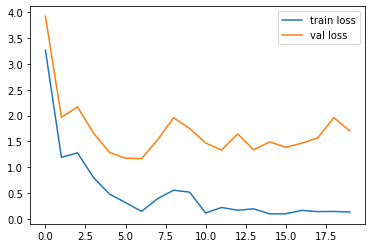

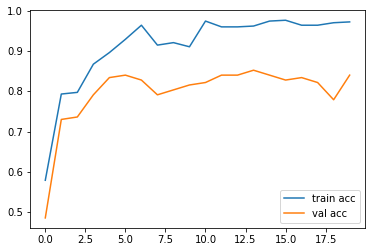

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('C:\\Users\\ansar\\Desktop\\Fabric defect detection using inception v3 final\\final\\newmodel_inception.h5')

In [19]:

y_pred = model.predict(test_set)


In [20]:
y_pred

array([[4.84290774e-10, 1.00000000e+00, 1.89180807e-19, 1.40291590e-18],
       [1.00000000e+00, 2.35809592e-12, 1.29185255e-14, 7.47594966e-13],
       [2.68421555e-03, 9.97315705e-01, 2.38663689e-09, 6.28252366e-08],
       [9.96528924e-01, 3.47110792e-03, 1.39472086e-20, 1.66030977e-14],
       [9.99758780e-01, 1.25121091e-09, 3.90901107e-07, 2.40844558e-04],
       [1.00000000e+00, 1.53619065e-23, 1.26371537e-12, 1.00510542e-08],
       [9.88213539e-01, 7.54455770e-14, 7.96874844e-10, 1.17864590e-02],
       [9.98784721e-01, 5.11115469e-14, 1.21534220e-03, 3.97454478e-08],
       [1.59311516e-03, 8.12320292e-01, 1.18347012e-01, 6.77395314e-02],
       [1.40166523e-09, 9.68534468e-24, 1.35110821e-17, 1.00000000e+00],
       [5.40390602e-07, 4.87641222e-25, 5.29492951e-18, 9.99999404e-01],
       [1.00000000e+00, 1.69811516e-21, 2.49851334e-10, 7.36485178e-12],
       [1.00000000e+00, 7.49555757e-27, 1.48651209e-12, 1.99038428e-15],
       [9.99999881e-01, 1.73439870e-19, 2.05999260e

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0,
       1, 2, 0, 3, 3, 0, 3, 1, 0, 3, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 3,
       2, 3, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 1, 2, 1, 1, 2, 3,
       1, 0, 1, 3, 0, 2, 0, 0, 0, 3, 0, 0, 3, 2, 1, 0, 2, 1, 3, 2, 3, 2,
       0, 1, 3, 2, 3, 1, 3, 0, 0, 0, 3, 2, 1, 0, 3, 3, 1, 1, 1, 1, 3, 0,
       0, 0, 3, 1, 0, 2, 0, 0, 0, 3, 3, 3, 2, 0, 3, 0, 0, 2, 2, 0, 3, 2,
       0, 0, 3, 0, 3, 2, 0, 1, 0, 2, 3, 3, 3, 3, 1, 3, 0, 2, 3, 3, 0, 3,
       0, 0, 3, 1, 2, 1, 0, 0, 3], dtype=int64)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('C:\\Users\\javed\\Desktop\\resized\\newmodel_inception.h5')

In [ ]:
img_data

NameError: name 'img_data' is not defined

In [ ]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.9745471, 0.0254529]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([ True])

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0'